## Import Library

In [1]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  

## Import Data

#### Context

It is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

#### Content

The replenishment of the majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 136-145) for the center-meal combinations in the test set


#### Objection 

Forecasting accurately number of order (num_order)

Data consist of  3 file:
- train.csv: data for training model
- test.csv: data for submission prediction
- sample submission.csv: sample file for submission

In [2]:
train = pd.read_excel('train.xlsx')
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
test = pd.read_csv('test.csv')
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1017495,136,55,1885,148.44,148.44,0,0
1,1395634,136,55,1993,151.38,151.38,0,0
2,1007493,136,55,2539,152.35,151.35,0,0
3,1042952,136,55,2631,96.03,165.93,0,0
4,1022147,136,55,1248,97.00,165.93,0,0


In [42]:
submission = pd.read_csv('submission.csv')
submission.head()

,id,week,num_orders
0,1017495,136,NaN
1,1395634,136,NaN
2,1007493,136,NaN
3,1042952,136,NaN
4,1022147,136,NaN


In [5]:
fulfilment_center_info = pd.read_csv("fulfilment_center_info.csv")
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
meal_info = pd.read_csv("meal_info.csv")
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
train = pd.merge(train,fulfilment_center_info, on='center_id')
train = pd.merge(train,meal_info, on='meal_id')

## Feature Selection

In [8]:
#Menghapus Variabel yang tidak diperlukan
train = train.drop(columns=['id'])
train

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [9]:
#Mengambil data train dengan week 1 sampai 135
train = train[(train['week'] >= 1) & (train['week'] <= 135)]

## Eksplorasi Data

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423727 entries, 0 to 423726
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   423727 non-null  int64  
 1   center_id              423727 non-null  int64  
 2   meal_id                423727 non-null  int64  
 3   checkout_price         423727 non-null  float64
 4   base_price             423727 non-null  float64
 5   emailer_for_promotion  423727 non-null  int64  
 6   homepage_featured      423727 non-null  int64  
 7   num_orders             423727 non-null  int64  
 8   city_code              423727 non-null  int64  
 9   region_code            423727 non-null  int64  
 10  center_type            423727 non-null  object 
 11  op_area                423727 non-null  float64
 12  category               423727 non-null  object 
 13  cuisine                423727 non-null  object 
dtypes: float64(3), int64(8), object(3)
memory

Berdasarkan output di atas dapat diketahui bahwa data train terdiri dari 456.548 baris dan 9 kolom dengan rincian tipe data untuk masing-masing variabel sebagai berikut:

- week : integer
- center_id : integer 
- meal_id : integer
- checkout_price : float (desimal)
- base_price : float (desimal)
- emailer_for_promotion : integer
- homepage_featured : integer
- num_orders : integer
- city_code : integer
- region_code : integer
- center_type : object
- op_area : float
- category : object
- cuisine : object

### Analisis Data Deskriptif

In [11]:
train.describe()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000,423727.000000
mean,69.677332,82.109469,2023.956295,331.526166,353.732761,0.083353,0.111315,264.550536,601.562478,56.609468,4.083245
std,38.686607,45.977420,547.370379,153.085823,160.919513,0.276416,0.314522,403.573030,66.206777,17.641225,1.091407
min,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000
25%,37.000000,43.000000,1558.000000,228.010000,243.500000,0.000000,0.000000,54.000000,553.000000,34.000000,3.600000
50%,70.000000,76.000000,1971.000000,292.030000,309.490000,0.000000,0.000000,136.000000,596.000000,56.000000,4.000000
75%,103.000000,110.000000,2539.000000,444.290000,458.870000,0.000000,0.000000,324.000000,651.000000,77.000000,4.500000
max,135.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000


Berdasarkan statistika deskriptif di atas dapat diperoleh beberapa informasi sebagai berikut:

Berdasarkan Nilai Rata-Rata
- checkout_price memiliki rata-rata sebesar 332.238933, menunjukkan bahwa harga rata-rata checkout pengantaran makanan berada pada kisaran 332.238933.
- base_price memiliki rata-rata sebesar 354.156627	, menunjukkan bahwa harga dasar rata-rata berada pada kisaran nilai tersebut. Nilai rata-ratanya yang lebih tinggi dibandingkan dengan checkout_price menandakan bahwa kemungkinan terdapat pengurangan/diskon.
- num_orders memiliki rata-rata sebesar 261.872760, menunjukkan bahwa rata-rata jumlah order makanan adalah sebesar 262 orderan.

Berdasarkan Nilai Standar Deviasi
- checkout_price memiliki standar deviasi sebesar 152.939723 yang menunjukkan bahwa variasi harga cukup signifikan untuk setiap pengantaran makanan.
- num_orders memiliki standar deviasi sebesar 395.922798 yang menunjukkan bahwa jumlah order untuk setiap pengantaran makanan sangat bervariasi.

Berdasarkan Nilai Minimum dan Maksimum
- week: Minggu terendah adalah 1, dan minggu tertinggi adalah 145.
- checkout_price: Harga checkout minimum adalah 2,97, dan harga maksimum adalah 866,27.
- num_orders: Pesanan minimum adalah 13, sedangkan pesanan maksimum mencapai 24299, menunjukkan adanya outlier atau produk dengan popularitas sangat tinggi.
- region_code: Kode wilayah terendah adalah 23, dan tertinggi adalah 93, menggambarkan terdapat variasi wilayah cakupan data.

### Melihat Sebaran Data

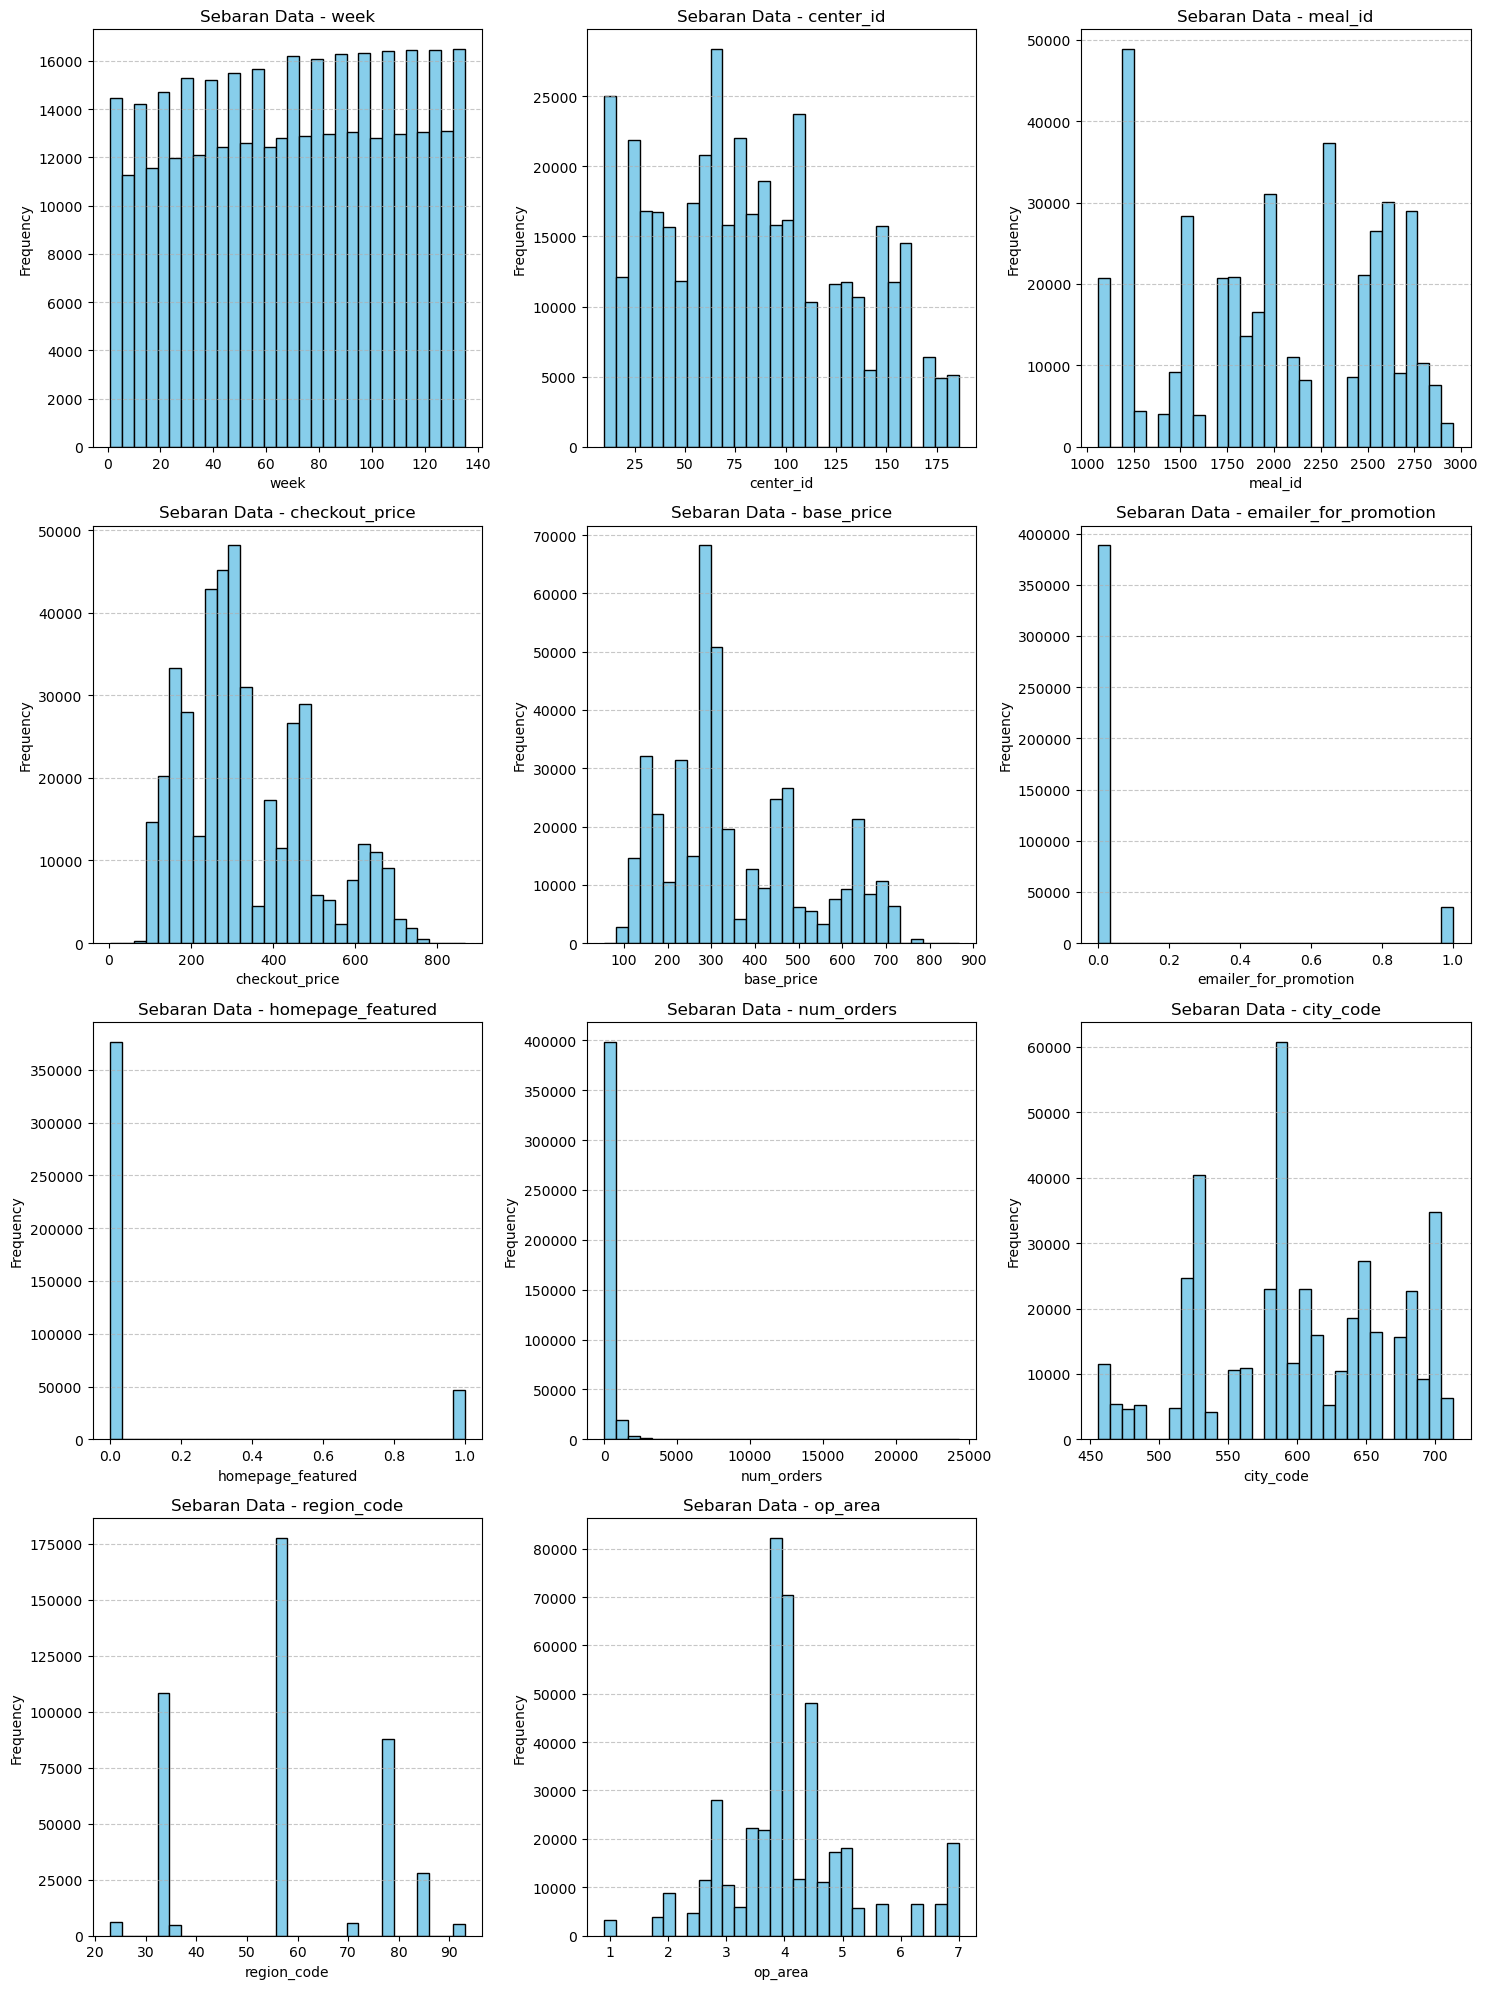

In [12]:
import math

# Pilih kolom numerik
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Tentukan ukuran grid
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Plot semua histogram dalam satu grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    axes[i].hist(train[column], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Sebaran Data - {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hilangkan sisa plot kosong (jika ada)
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Melihat Tanda Adanya Outlier

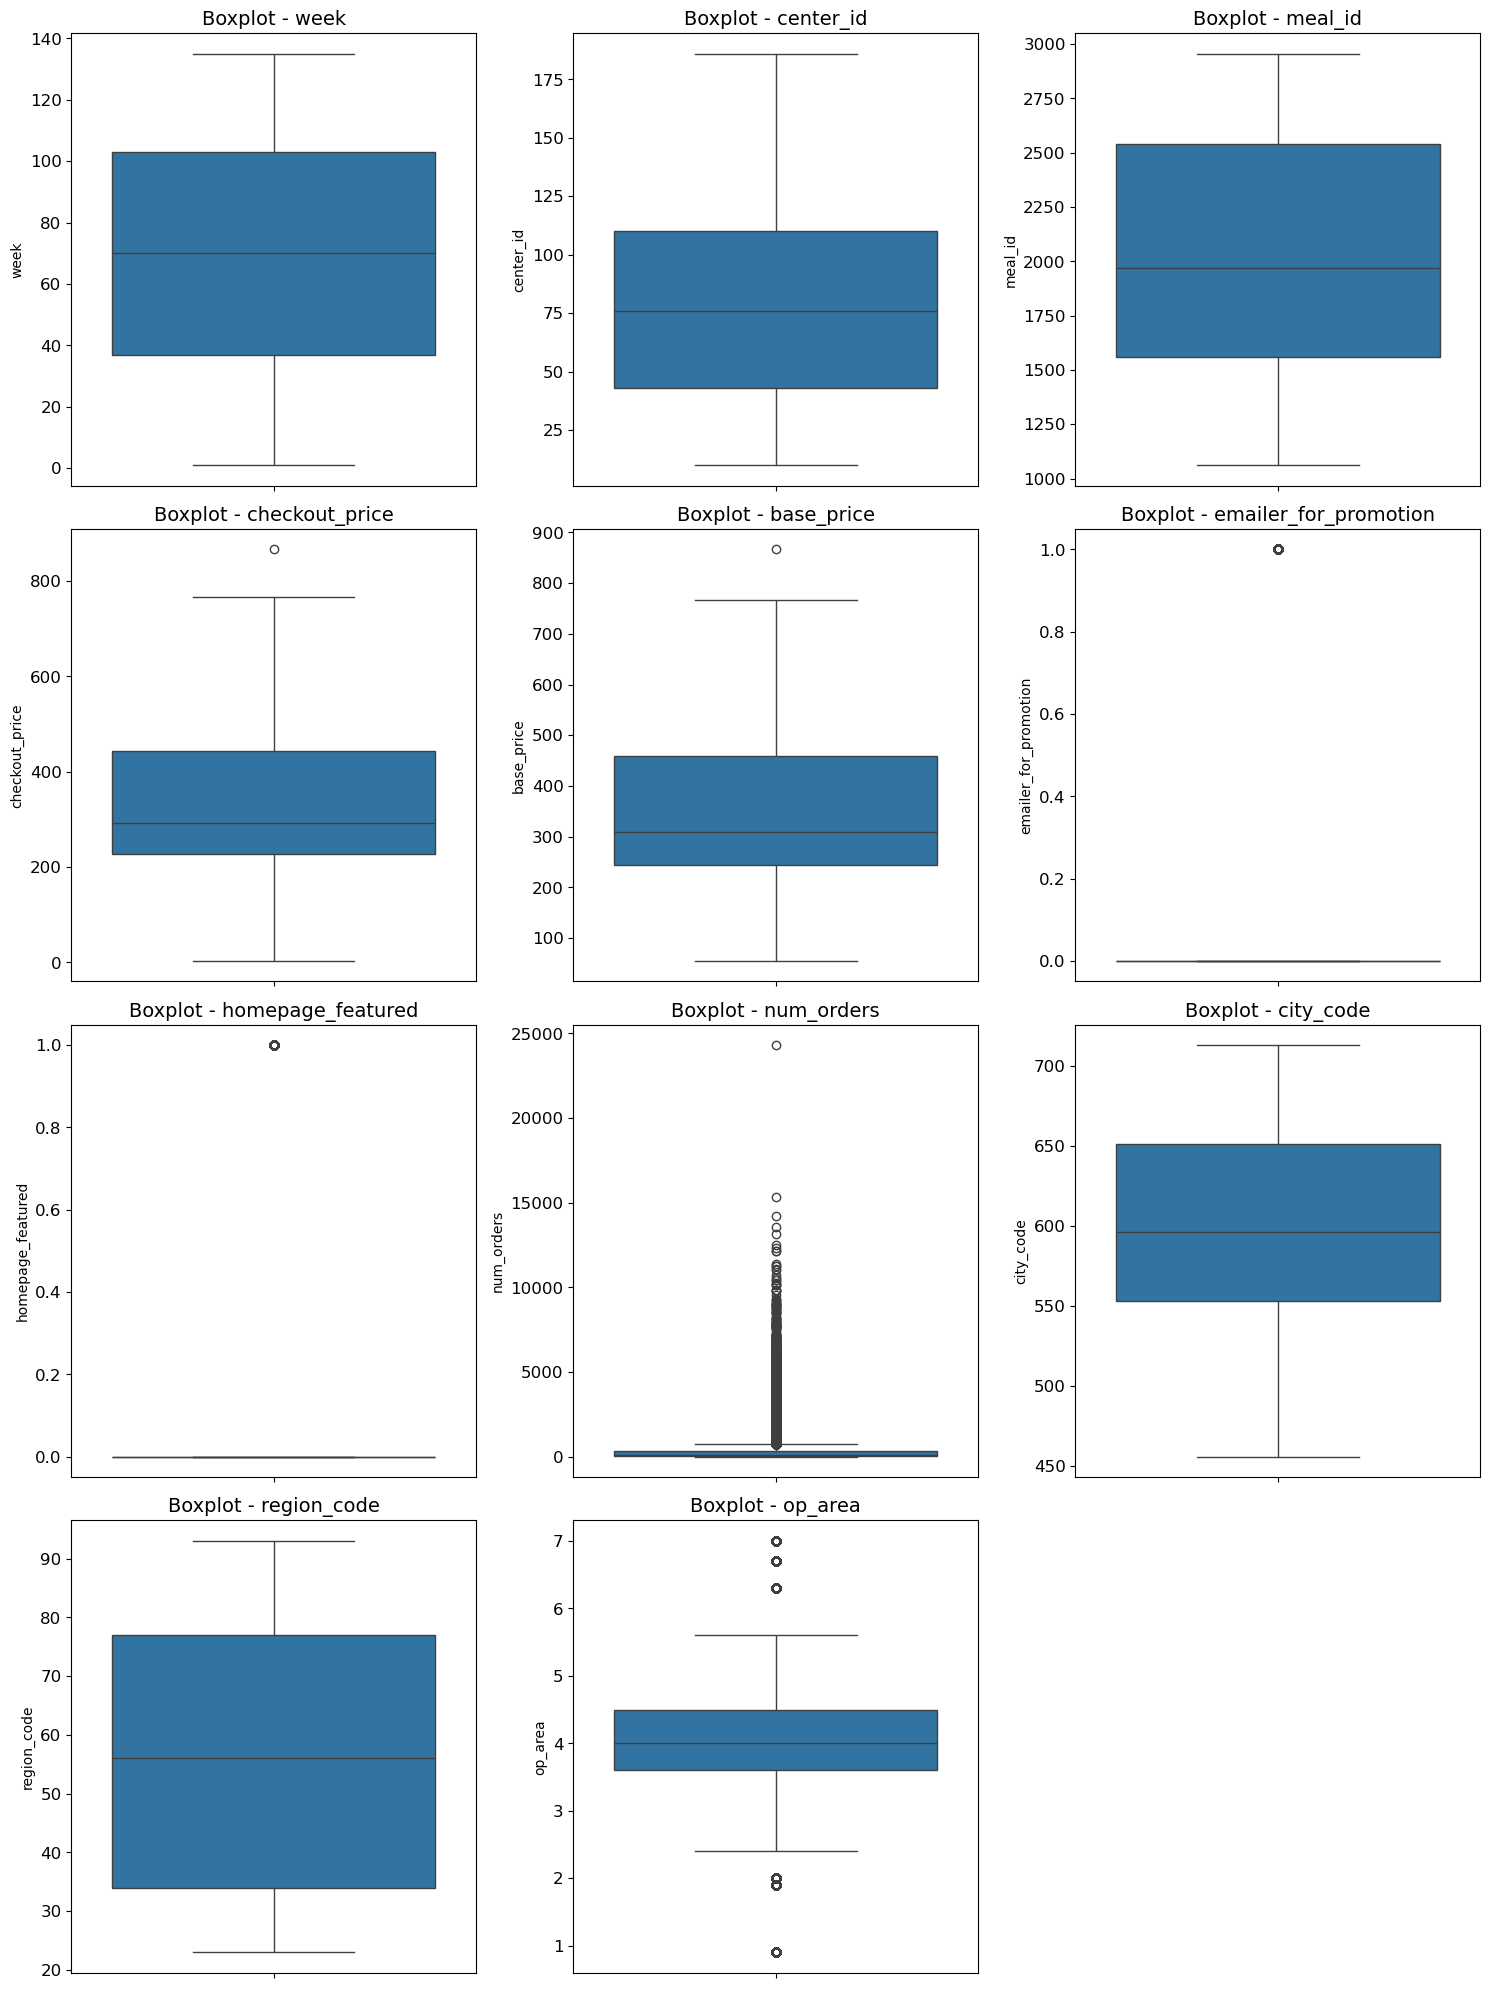

In [13]:
# Memilih hanya kolom numerik
numeric_cols = train.select_dtypes(include=['int64', 'float64'])

# Menentukan jumlah subplot berdasarkan jumlah variabel numerik
num_vars = len(numeric_cols.columns)
rows = (num_vars // 3) + (num_vars % 3 > 0)  # Membuat baris yang cukup untuk 3 kolom per baris

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))  # Ukuran besar
axes = axes.flatten()  # Flatten supaya bisa diiterasi langsung

# Membuat boxplot untuk setiap variabel numerik
for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(y=train[col], ax=axes[i])
    axes[i].set_title(f'Boxplot - {col}', fontsize=14)
    axes[i].tick_params(axis='y', labelsize=12)

# Hapus subplot kosong jika jumlah variabel tidak kelipatan 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Biar lebih rapi
plt.show()

Berdasarkan boxplot di atas,dapat dilihat bahwa ada beberapa variabel yang memiliki outlier, seperti checkout_price, base_price, dan num_orders. 

*emailer_for_promotion dan homepage_featured tidak diikutsertakan untuk nantinya ditangani outliernya karena merupakan data kategorik. Sedangkan, op_area merupaka kode operasional are, jadi tidak perlu penanganan.

### Distribusi Jumlah Order Berdasarkan Kategori Makanan 

C:\Users\USER\AppData\Local\Temp\ipykernel_5832\2257889242.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='num_orders', data=train, color='skyblue', ci=None)


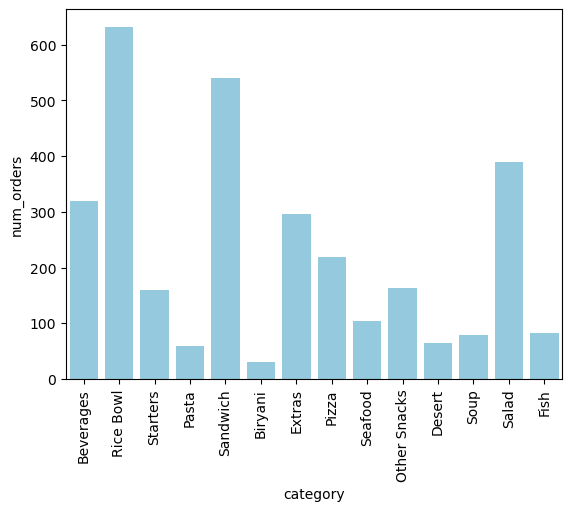

In [14]:
sns.barplot(x='category', y='num_orders', data=train, color='skyblue', ci=None)
plt.xticks(rotation=90)
plt.show()

Berdasarkan bar chart di atas dapat diketahui beberapa informasi sebagai berikut:
- Rice bowl dan Sandwich memiliki jumlah pesanan tertinggi. Hal tersebut kemungkinan karena merupakan makanan cepat saji, mudah dipesan, dan ada pada tiap-tiap region dengan rasa yang dapat disesuaikan sesuai dengan kekhasan masing-masing region.
- Pasta dan Biryani memiliki jumlah pesanan terendah. Hal ini mungkin terjadi karena faktor harga yang lebih mahal, ketersediaan yang rendah atau kedua makanan tersebut kurang populer di beberapa region.

### Distribusi Jumlah Order Berdasarkan Jenis Makananan

C:\Users\USER\AppData\Local\Temp\ipykernel_5832\936241504.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cuisine', y='num_orders', data=train, color='skyblue', ci=None)


<Axes: xlabel='cuisine', ylabel='num_orders'>

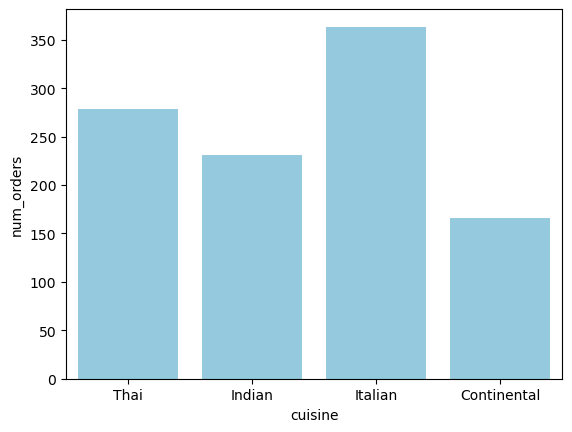

In [15]:
sns.barplot(x='cuisine', y='num_orders', data=train, color='skyblue', ci=None)

Berdasarkan bar chart di atas, dapat diketahui bahwa makanan yang paling sering dipesan melalui jasa pengantaran makanan adalah makanan Italia. Sedangkan, makanan yang paling sedikit dipesan melalui jasa pengantaran makanan kontinental (negara-negara di Eropa dan wilayah Barat lainnya)

### Distribusi Jumlah Order Berdasarkan Region Pemesan

C:\Users\USER\AppData\Local\Temp\ipykernel_5832\2687036100.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region_code', y='num_orders', data=train, color='skyblue', ci=None)


<Axes: xlabel='region_code', ylabel='num_orders'>

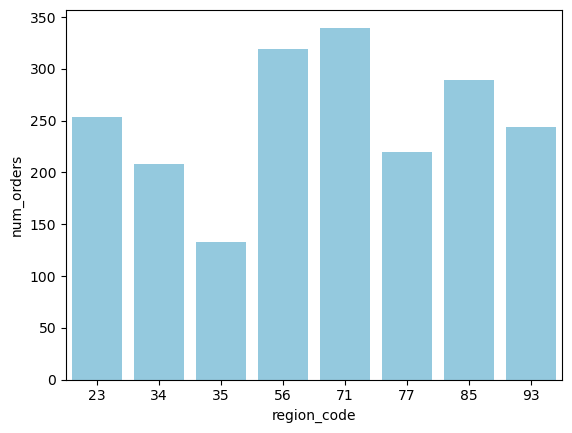

In [16]:
sns.barplot(x='region_code', y='num_orders', data=train, color='skyblue', ci=None)

Berdasarkan bar chart di atas dapat diketahui bahwa region yang paling banyak melakukan orderan menggunakan jasa pengantaran makanan adalah region dengan kode 71. Sedangkan region yang paling sedikit melakukan orderan menggunakan jasa pengantaran makanan adalah region dengan kode 35.

### Distribusi Kategori Makanan Berdasarkan Jenis Makakan

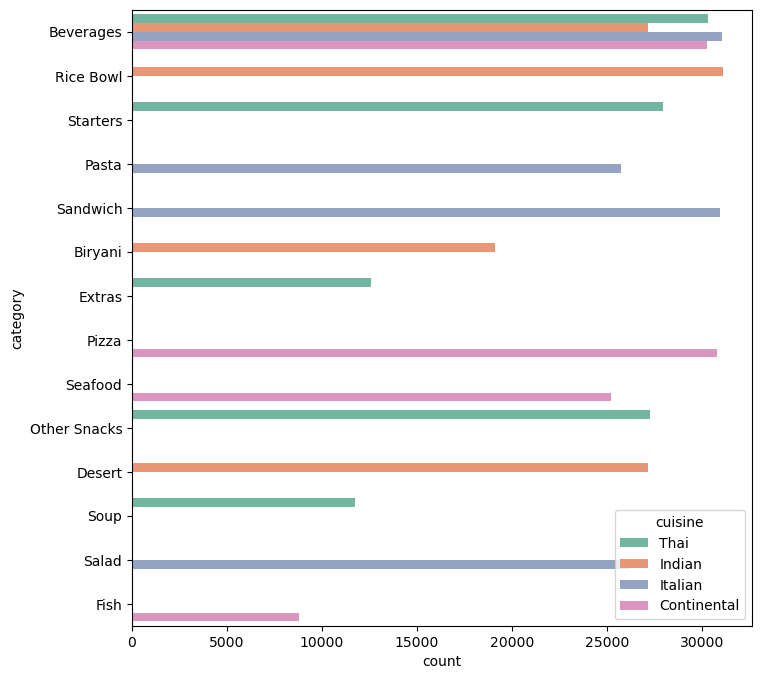

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y='category', hue='cuisine', data=train, ax=ax, palette="Set2")
plt.show()

Berdasarkan bar chart di atas dapat diperoleh beberapa informasi seperti:
- Kategori beverages ada pada tiap jenis masakan, tetapi yang paling sering dipesan adalah beverages italian.
- Kategori pasta yang paling banyak dipesan adalah pasta Italian.

Rekomendasi:

Setiap fulfillment centers sebaiknya berfokus pada menu kategori makanan yang populer, seperti pasta (Italian), beverages (Italian), dan pizza (Continental) dan mengoptimalkan stok bahan baku sesuai dengan pola pesanan, misalnya dengan cara mengurangi bahan untuk kategori makanan yang jarang dipesan.

### Melihat Korelasi Antar Variabel

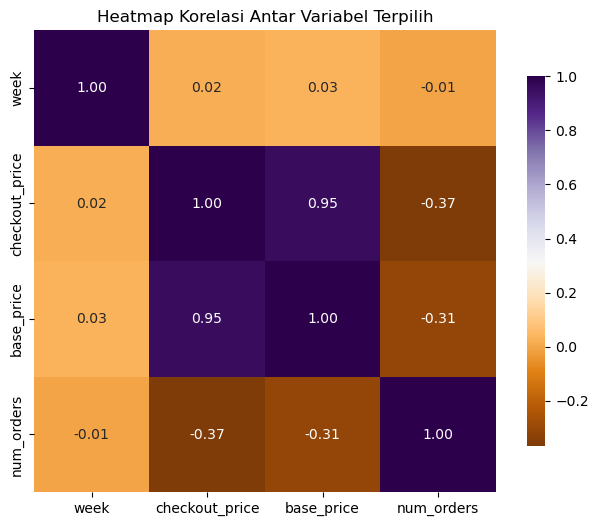

In [35]:
# Memilih hanya variabel numerik yang relevan
selected_columns = ['week', 'checkout_price', 'base_price', 'num_orders']
numeric_train = train[selected_columns]

# Menghitung korelasi
correlation_matrix = numeric_train.corr()

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True,  
            fmt=".2f",  
            cmap="PuOr",  
            square=True,  
            cbar_kws={'shrink': .8})  
plt.title("Heatmap Korelasi Antar Variabel Terpilih")
plt.show()

Berdasarkan heatmap di atas dapat kita lihat bahwa yang memiliki korelasi positif tinggi adalah 
- checkout price dengan base price sebesar 95%

Hal ini berarti bahwa semakin besar harga checkout, maka akan semakin besar pula harga dasarnya dan begitupun sebaliknya.


Sedangkan yang berkorelasi positif Rendah

- num_orders dengan emailer_for_promotion sebesar 28%

Hal ini berarti bahwa semakin banyak jumlah order yang ada maka semakin banyak pula kemungkinan para pembeli melihat email promosi dan begitupun sebaliknya.

- num_orders dengan homepage_featured sebear 29%

Hal ini berarti bahwa semakin banyak jumlah order yang ada maka semakin banyak pula kemungkinan para pembeli telah melihat fitur pada homepage dan begitupun sebaliknya.

Rekomendasi:

Walaupun promosi melalui email dan fitur yang ditampilkan pada homepage tidak memiliki korelasi yang tinggi dalam meningkatkan jumlah order. Namun, tidak ada salahnya untuk tetap melalukan promosi melalui email para customer, tidak perlu terlalu sering (agar tidak dianggap spam), tapi cukup pada saat restoran memberikan diskon pada tanggal kembar atau sekedar mengajak kembali customer yang sudah seminggu tidak melakukan repeat order. 

Kemudian, menampilkan seluruh menu yang ada di restoran untuk menarik minat customer jauh lebih banyak lagi, tidak lupa juga mempercantik homepage tersebut agar lebih indah dan nyaman untuk dilihat customer.

### Cek Data Hilang

In [19]:
train.isnull().sum()

week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

### Cek Data Duplikat

In [20]:
# Cek data duplikat
duplicates = train.duplicated()

# Jumlah total duplikat
print(f"Jumlah data duplikat: {duplicates.sum()}")

Jumlah data duplikat: 0


Tidak terdapat data hilang ataupun data duplikat, maka dapat diteruskan untuk pembuatan model untuk prediksi

## Data Pre-Processing

Karena sebelumnya pada saat pengecekan outlier melalui boxplot terdapat beberapa variabel yang memiliki outlier, maka aakan dilakukan penanganan terlebih dahulu menggunakan metode capping. Metode capping ini dipilih karena metode ini lebih aman dan tidak menghilangkan informasi dengan cara mengganti nilai outlier dengan nilai maksimum atau minimum dari range data yang tidak termasuk outlier.

In [21]:
# List variabel numerik yang memiliki outlier
outlier_columns = ['checkout_price', 'base_price', 'num_orders'] 

for col in outlier_columns:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping outlier
    train[col] = np.where(train[col] > upper_bound, upper_bound, train[col])
    train[col] = np.where(train[col] < lower_bound, lower_bound, train[col])

print("Outlier telah ditangani dengan metode capping!")

Outlier telah ditangani dengan metode capping!


C:\Users\USER\AppData\Local\Temp\ipykernel_5832\3188041582.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = np.where(train[col] > upper_bound, upper_bound, train[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_5832\3188041582.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = np.where(train[col] < lower_bound, lower_bound, train[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_5832\3188041582.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

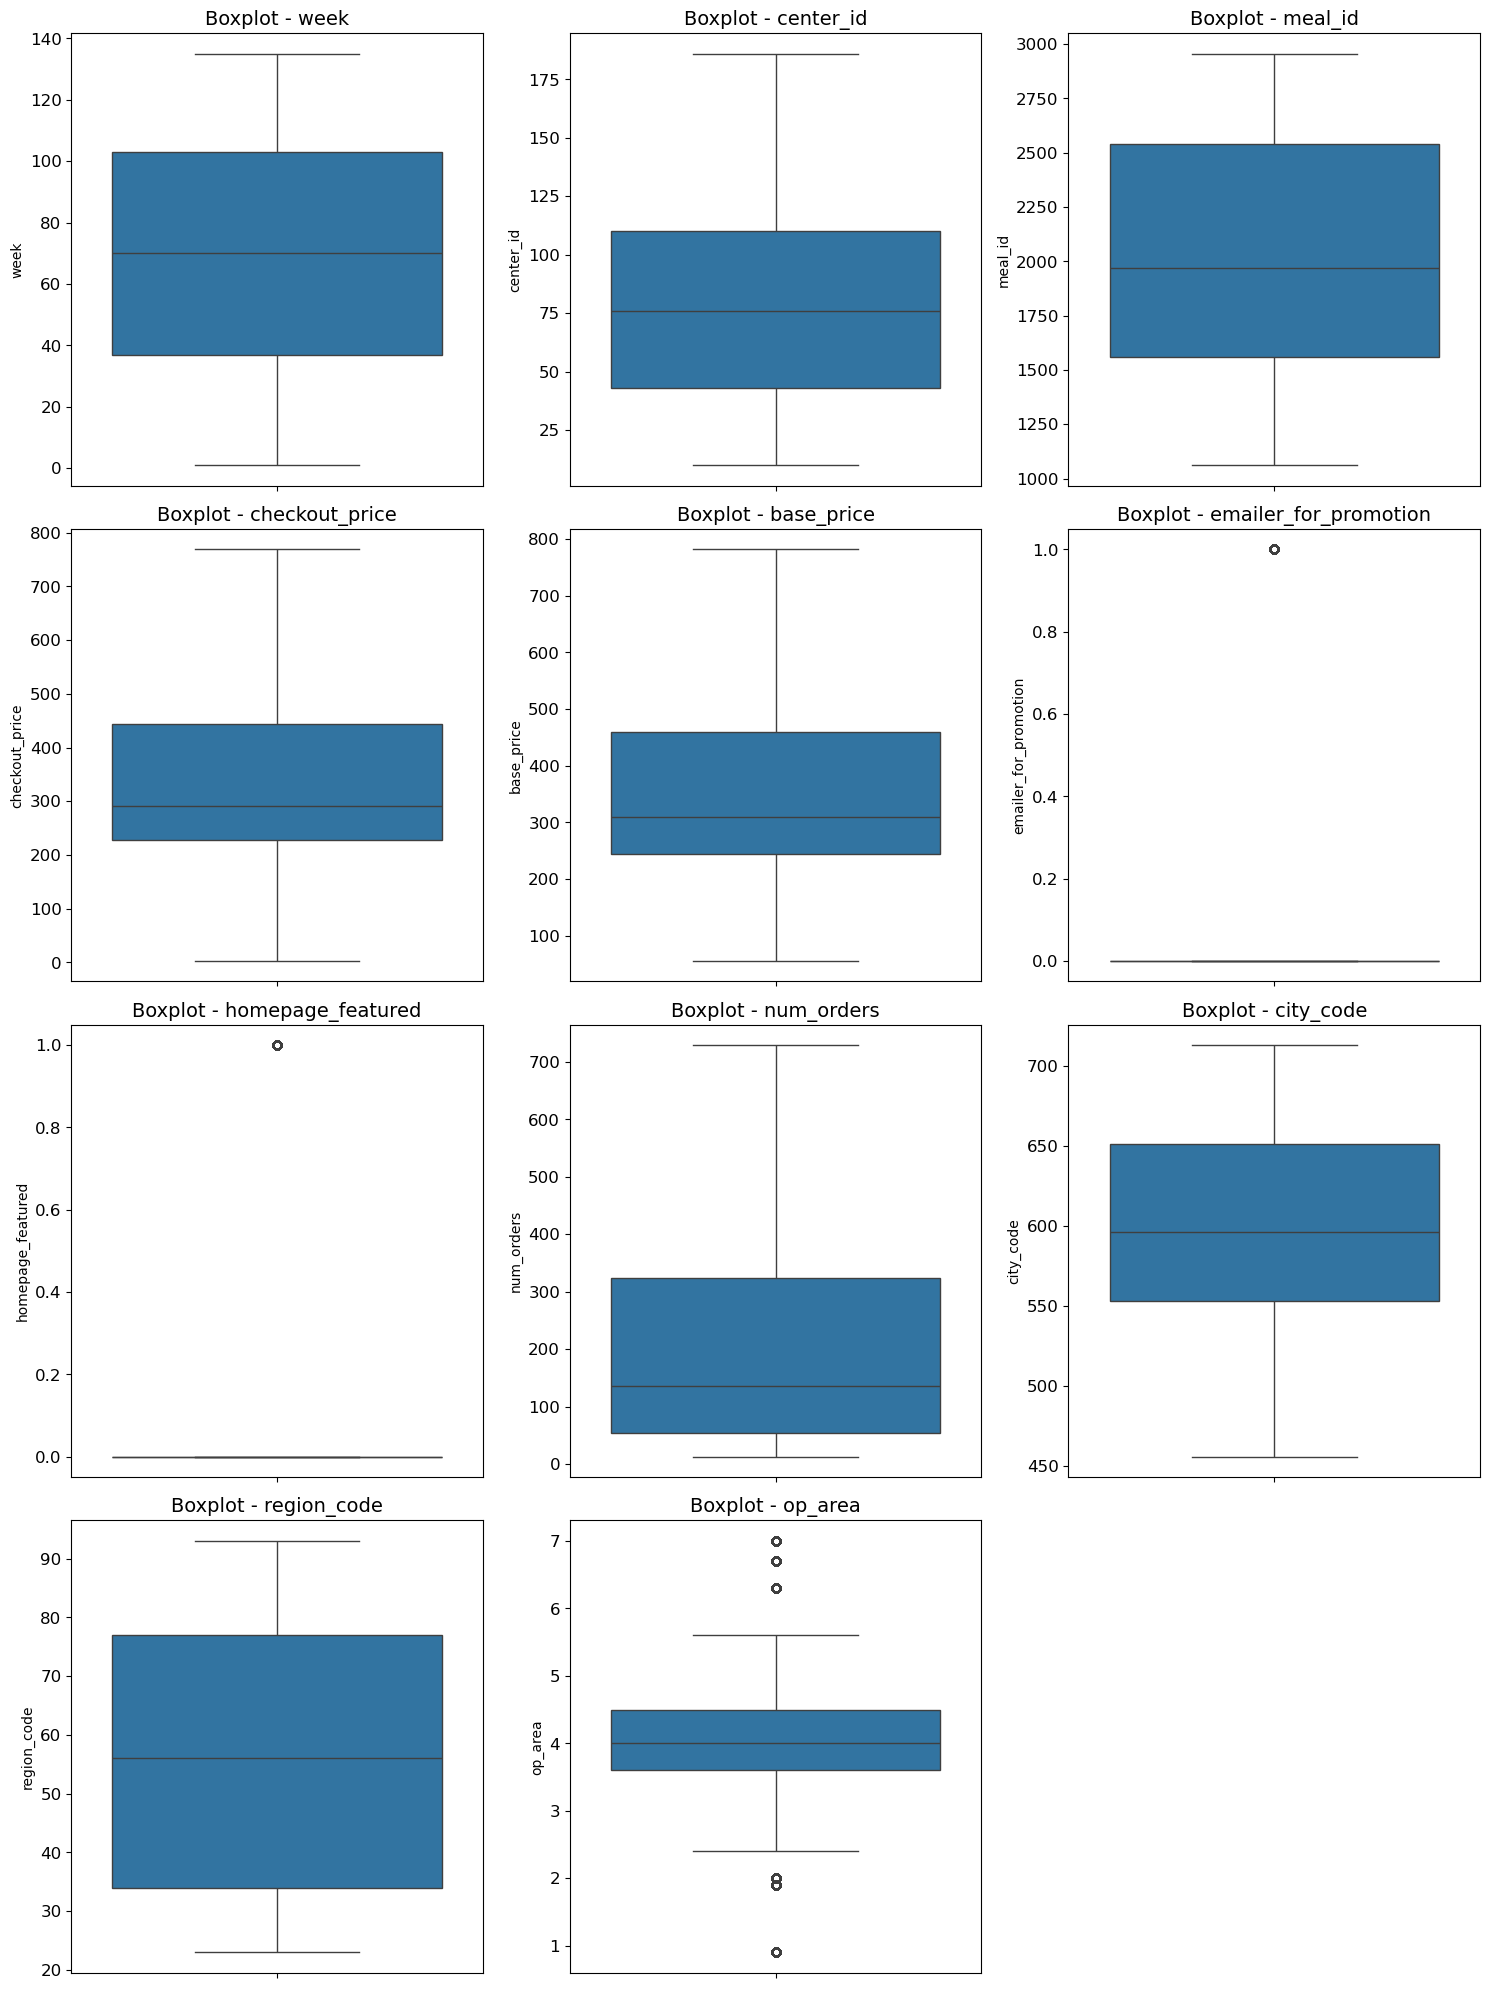

In [22]:
# Memilih hanya kolom numerik
numeric_cols = train.select_dtypes(include=['int64', 'float64'])

# Menentukan jumlah subplot berdasarkan jumlah variabel numerik
num_vars = len(numeric_cols.columns)
rows = (num_vars // 3) + (num_vars % 3 > 0)  # Membuat baris yang cukup untuk 3 kolom per baris

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))  # Ukuran besar
axes = axes.flatten()  # Flatten supaya bisa diiterasi langsung

# Membuat boxplot untuk setiap variabel numerik
for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(y=train[col], ax=axes[i])
    axes[i].set_title(f'Boxplot - {col}', fontsize=14)
    axes[i].tick_params(axis='y', labelsize=12)

# Hapus subplot kosong jika jumlah variabel tidak kelipatan 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Biar lebih rapi
plt.show()

## Splitting Data

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = train.drop(columns=['num_orders','city_code','region_code','center_type','op_area','category','cuisine'])  # Menghapus kolom target dan beberapa kolom yang tidak diperlukan
y = train['num_orders']

# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Prediksi Menggunakan Random Forest

Random forest adalah sebuah model machine learning yang digunakan untuk tugas klasifikasi dan regresi. Algoritma ini merupakan bentuk ensemble learning, yang berarti menggabungkan beberapa model prediktif yang lebih sederhana untuk mencapai prediksi yang lebih akurat dan stabil.

Metode ini dipilih karena memiliki beberapa kelebihan, seperti:
- Mengatasi Overfitting
- Stabil (memiliki kemampuan yang lebih baik dalam menangani noise dan variasi dalam data)

sumber: dqlab.id


=== Random Forest Regressor ===
Mean Squared Error (MSE): 6724.8092614152865
R-squared (R2): 0.8577026425953629


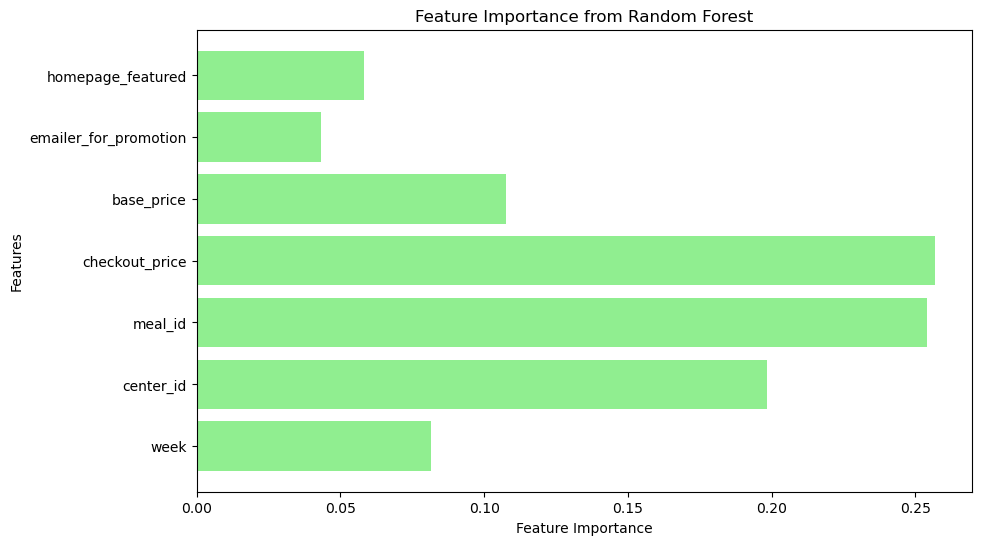

In [24]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest Regressor
print("\n=== Random Forest Regressor ===")
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R-squared (R2): {rf_r2}")

# Visualisasi pentingnya fitur untuk Random Forest
features = X_train.columns
feature_importances_rf = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances_rf, color='lightgreen')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

In [25]:
# Membuat DataFrame untuk membandingkan hasil
comparison2 = pd.DataFrame({'Actual': y_test, 'Predicted': rf_y_pred}).reset_index(drop=True)
print(comparison2.head(10))  # Menampilkan 10 data pertama

   Actual  Predicted
0   161.0     357.92
1    15.0      37.35
2   648.0     599.36
3   298.0     289.05
4    28.0      39.54
5   257.0     205.04
6   729.0     729.00
7    41.0      76.56
8   242.0     408.63
9    15.0      38.80


## Prediksi Menggunakan XGBoost

XGBoost merupakan salah satu algoritma yang paling populer dan paling banyak digunakan karena algoritma ini termasuk algoritma yang powerful. Pada dasarnya, algoritma ini sama dengan algoritma gradient boost hanya saja menggunakan beberapa proses tambahan sehingga lebih powerful. Proses tersebut adalah pemangkasan, newton boosting, dan parameter pengacakan ekstra. 

Metode ini dipilih karena memiliki beberapa kelebihan, seperti:
- Performa yang tinggi
- Skalabilitas (dirancang untuk menangani dataset yang besar)
- Dapat Penanganan variabel campuran

sumber: dqlab.id

In [26]:
#pip install xgboost


=== XGBoost Regressor ===
Mean Squared Error (MSE): 11958.02025711906
R-squared (R2): 0.7469675917587217


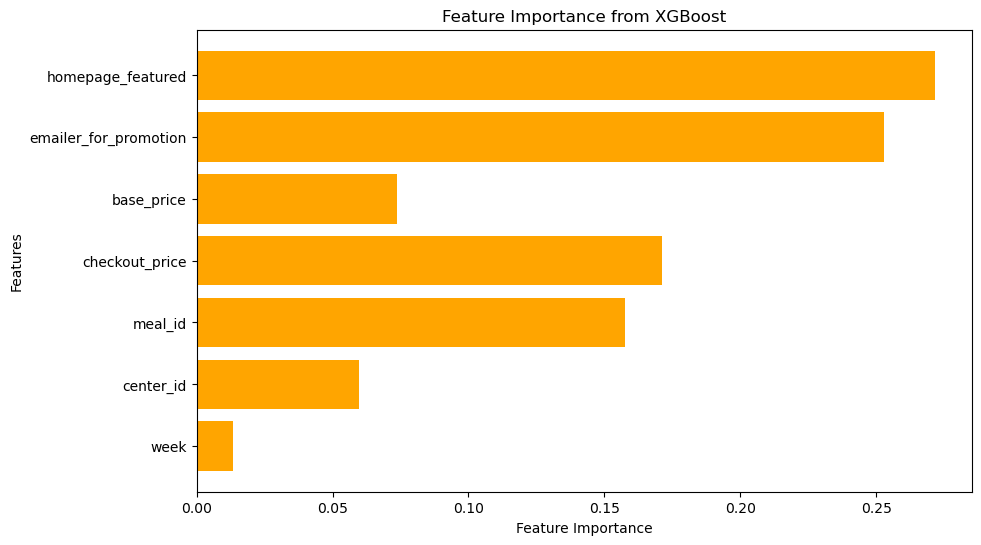

In [27]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost Regressor
print("\n=== XGBoost Regressor ===")
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

xgb_y_pred = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
print(f"Mean Squared Error (MSE): {xgb_mse}")
print(f"R-squared (R2): {xgb_r2}")

# Visualisasi pentingnya fitur untuk XGBoost
features = X_train.columns
feature_importances_xgb = xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances_xgb, color='orange')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from XGBoost')
plt.show()

In [28]:
# Membuat DataFrame untuk membandingkan hasil
comparison3 = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_y_pred}).reset_index(drop=True)
print(comparison3.head(10))  # Menampilkan 10 data pertama

   Actual   Predicted
0   161.0  417.312347
1    15.0   43.484715
2   648.0  529.377930
3   298.0  360.906128
4    28.0   70.731438
5   257.0  227.730148
6   729.0  780.646423
7    41.0   88.838280
8   242.0  501.360718
9    15.0  108.373932


## Prediksi Menggunakan LightBGM

LightBGM mengimplementasikan algoritma Gradient Boosting Decision Tree (GBDT) konvensional dengan penambahan dua teknik baru: Gradient Based One-Side Sampling (GOSS) dan Exclusive Feature Bundling (EFB). Teknik-teknik ini dirancang untuk secara signifikan meningkatkan efisiensi dan skalabilitas GBDT.

Metode ini dipilih karena beberapa kelebihan, seperti:
- Penanganan yang kuat terhadap berbagai tipe data.
- Lebih efiseien

sumber: aws.amazon.com

In [29]:
#pip install lightgbm

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767
[LightGBM] [Info] Number of data points in the train set: 338981, number of used features: 7
[LightGBM] [Info] Start training from score 222.583723
Mean Squared Error (MSE): 11906.509197565818
R-squared (R2): 0.7480575687925085


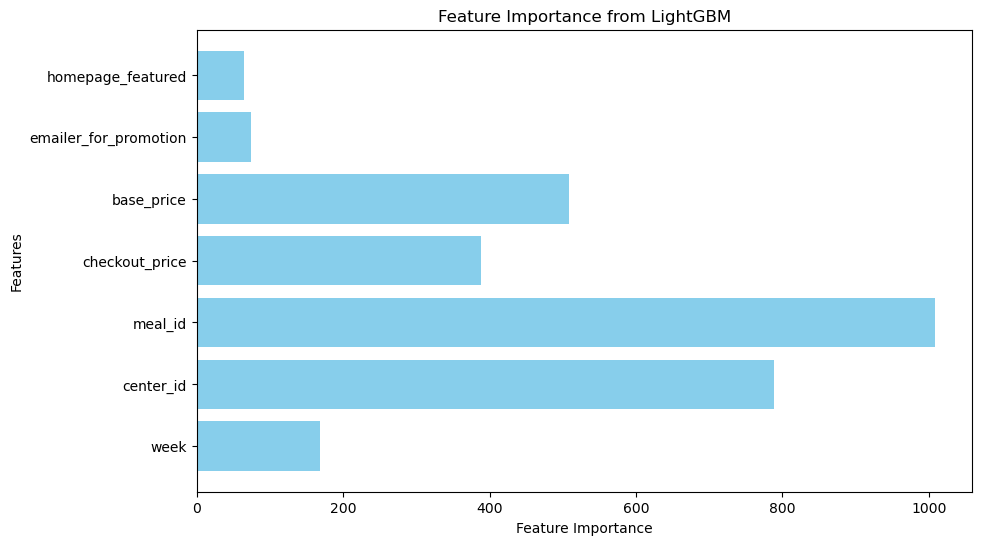

In [30]:
# Import Library
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, balanced_accuracy_score

# Buat model LightGBM Regressor
model = lgb.LGBMRegressor(random_state=42)

# Latih model pada data training
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
lgb_mse = mean_squared_error(y_test, y_pred)
lgb_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {lgb_mse}")
print(f"R-squared (R2): {lgb_r2}")

# Visualisasi pentingnya fitur untuk XGBoost
features = X_train.columns
feature_importances_lgb = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances_lgb, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from LightGBM')
plt.show()

In [31]:
# Membuat DataFrame untuk membandingkan hasil
comparison4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
print(comparison4.head(10))

   Actual   Predicted
0   161.0  439.128367
1    15.0   48.225722
2   648.0  552.048320
3   298.0  411.742081
4    28.0   76.730176
5   257.0  227.052921
6   729.0  768.045782
7    41.0   76.232498
8   242.0  521.072564
9    15.0   56.146863


In [32]:
import pandas as pd

# Membuat DataFrame perbandingan evaluasi
comparison_table = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'LighGBM'],
    'Mean Squared Error (MSE)': [rf_mse, xgb_mse, lgb_mse],
    'R-squared (R2)': [rf_r2, xgb_r2, lgb_r2]
})

# Menentukan model terbaik berdasarkan MSE (terkecil) atau R-squared (terbesar)
best_model_mse = comparison_table.loc[comparison_table['Mean Squared Error (MSE)'].idxmin(), 'Model']
best_model_r2 = comparison_table.loc[comparison_table['R-squared (R2)'].idxmax(), 'Model']

print("\nTabel Perbandingan Evaluasi:")
print(comparison_table)

print(f"\nModel terbaik berdasarkan MSE: {best_model_mse}")
print(f"Model terbaik berdasarkan R-squared: {best_model_r2}")


Tabel Perbandingan Evaluasi:
           Model  Mean Squared Error (MSE)  R-squared (R2)
0  Random Forest               6724.809261        0.857703
1        XGBoost              11958.020257        0.746968
2        LighGBM              11906.509198        0.748058

Model terbaik berdasarkan MSE: Random Forest
Model terbaik berdasarkan R-squared: Random Forest


Berdasarkan hasil evaluasi menggunakan MSE dan R-squared terlihat bahwa model Random Forest yang memiliki nilai MSE paling kecil dan R-squared yang paling besar masing-masing sebesar  6724.809261 dan 0.857703 artinya model Random Forest lah yang paling baik untuk memprediksi banyak jumlah order apabila dibandingkan dengan model LightGBM dan XGBoost. Oleh karena itu, untuk melakukan peramalan jumlah order pada week 136 - 145 akan digunakan metode Random Forest.

## Menyimpan Hasil Prediksi pada Data Submission

In [43]:
# Pastikan data test sudah memiliki fitur yang sama seperti training
X_test = test[rf_model.feature_names_in_]  # Fitur yang digunakan oleh model

# Prediksi jumlah pesanan menggunakan model Random Forest yang sudah dilatih
predictions = rf_model.predict(X_test)

# Pastikan urutan id pada file submission sama seperti di test.csv
submission.loc[:, 'num_orders'] = predictions

# Simpan hasil prediksi ke dalam file submission
submission.to_csv('Final_Submission.csv', index=False)
print("Hasil prediksi berhasil disimpan ke file 'Final_Submission.csv'")

Hasil prediksi berhasil disimpan ke file 'Final_Submission.csv'


In [44]:
hasil_prediksi = pd.read_csv('Final_Submission.csv')
hasil_prediksi.head(10)

,id,week,num_orders
0,1017495,136,397.529593
1,1395634,136,335.354588
2,1007493,136,241.480097
3,1042952,136,195.409717
4,1022147,136,175.333516
5,1191480,136,252.358665
6,1082166,136,322.004657
7,1340029,136,223.050937
8,1423809,136,153.262294
9,1153607,136,126.495142
